# Part 02: Nominal Categorical Variables
Investigate the need to introduce embeddings for some features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load the dataset

In [ ]:
# loading the dataset
data = pd.read_csv('credit_risk_dataset.csv')
print(data.shape)

(32581, 12)


## Standard Cleaning

- remove odd data (e.g., age > 120 years, employment history length > age + 15 years)
- drop duplicates
- replace ordinal categorical variables or binary nominal variables with discrete numerical variables

In [ ]:
# drop outlier and unreasonable data
data = data[(data['person_emp_length'].isnull()) | (data['person_age'] >= 15+data['person_emp_length'])]
data = data[data['person_age']<100]

# drop duplicates
data = data.drop_duplicates()

# replace strings with integers
data['cb_person_default_on_file'].replace(['Y', 'N'], [1, 0], inplace = True)
data['loan_grade'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'], [1, 2, 3, 4, 5, 6, 7], inplace = True)

## Handle Missing Values

In [ ]:
# HANDLE MISSING VALUES (Notebook 01)
# PART 1: person_emp_length
# replace the missing values in the original dataset with the median
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace = True)

# PART 2: loan_int_rate
# drop NA values to facilitate computations
data_noNA = data.dropna()

X = data_noNA[['person_age', 'person_income', 'loan_amnt', 'cb_person_cred_hist_length', 'loan_grade', 'cb_person_default_on_file', 'loan_percent_income']]
X.loc[:, 'person_income'] = np.log(X['person_income'])
X.loc[:, 'loan_amnt'] = np.log(X['loan_amnt'])
y = data_noNA['loan_int_rate']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 34)

# train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predict the test set results
y_pred = regressor.predict(X_test)

data_NA = data[data['loan_int_rate'].isnull()]
data_NA_X = data_NA[['person_age', 'person_income', 'loan_amnt', 'cb_person_cred_hist_length', 'loan_grade', 'cb_person_default_on_file', 'loan_percent_income', 'loan_int_rate']]
data_NA_X.loc[:, 'person_income'] = np.log(data_NA_X['person_income'])
data_NA_X.loc[:, 'loan_amnt'] = np.log(data_NA_X['loan_amnt'])

data_NA_X.loc[:, 'loan_int_rate'] = regressor.predict(data_NA_X[['person_age', 'person_income', 'loan_amnt', 'cb_person_cred_hist_length', 'loan_grade', 'cb_person_default_on_file', 'loan_percent_income']])

data.update(data_NA_X)

## Nominal Categorical Variables

There are three nominal (not ordinal) categorical features/variables, one of which is binary. We are exluding the target (binary) variable. 

We are exploring how likely it is that these features are correlated with the target and other feautures.

In [13]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        16374
MORTGAGE    13366
OWN          2563
OTHER         106
Name: count, dtype: int64

In [14]:
data['loan_intent'].value_counts()

loan_intent
EDUCATION            6409
MEDICAL              6042
VENTURE              5679
PERSONAL             5496
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64

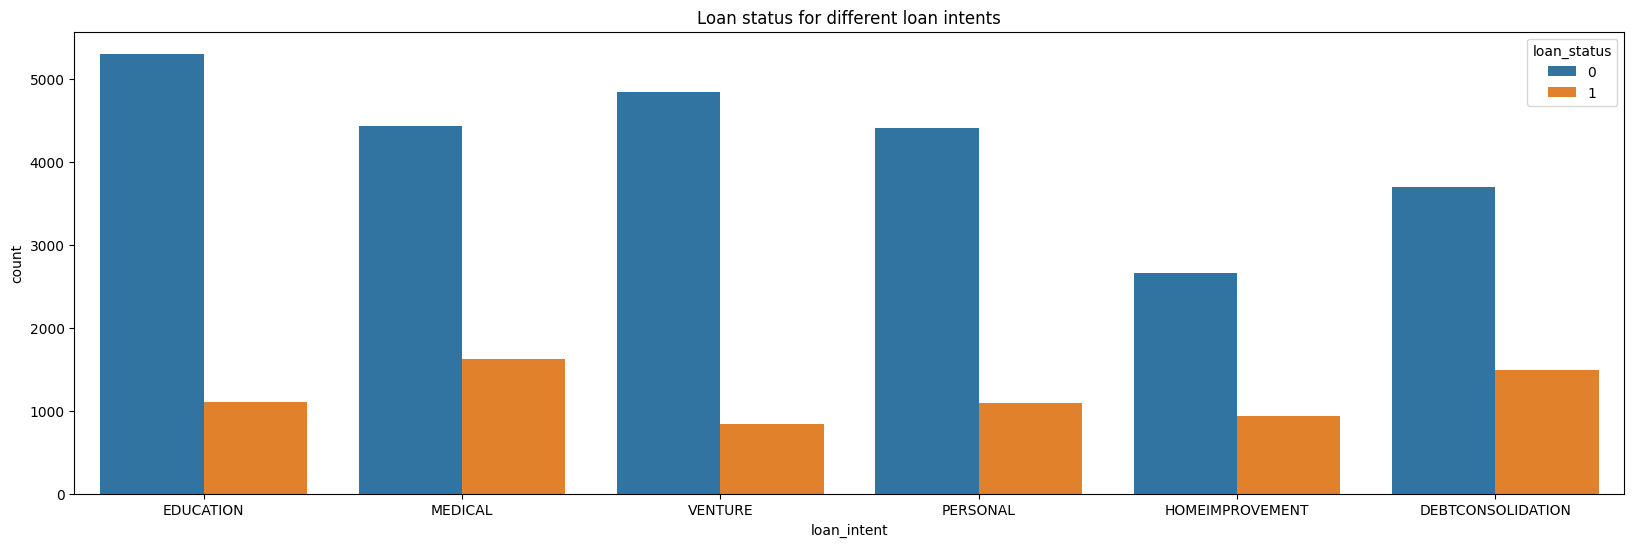

In [15]:
plt.figure(figsize=(20, 6))
sns.countplot(x='loan_intent', hue='loan_status', data=data)
plt.title('Loan status for different loan intents')
plt.show()

In [16]:
# get the ratio of loan status for each loan intent
data.groupby('loan_intent')['loan_status'].mean()

loan_intent
DEBTCONSOLIDATION    0.286760
EDUCATION            0.172570
HOMEIMPROVEMENT      0.261547
MEDICAL              0.267627
PERSONAL             0.198872
VENTURE              0.148618
Name: loan_status, dtype: float64

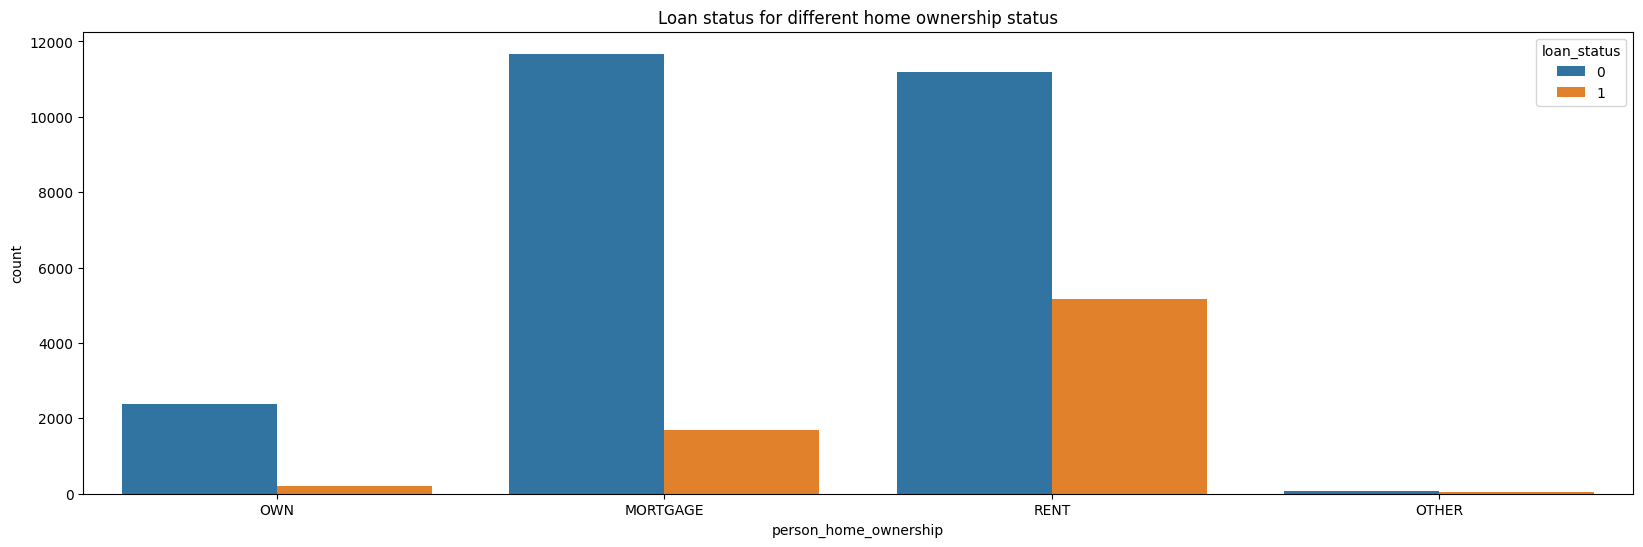

In [17]:
plt.figure(figsize=(20, 6))
sns.countplot(x='person_home_ownership', hue='loan_status', data=data)
plt.title('Loan status for different home ownership status')
plt.show()

In [18]:
data.groupby('person_home_ownership')['loan_status'].mean()

person_home_ownership
MORTGAGE    0.126216
OTHER       0.311321
OWN         0.074912
RENT        0.316111
Name: loan_status, dtype: float64

We will most likely include both variables (using either **one-hot encoding** or **indicator variables**). 